# NSI - Python

https://eduscol.education.fr/2068/programmes-et-ressources-en-numerique-et-sciences-informatiques-voie-g

## Les p-uplets nommés 
Les *p-uplets nommés* ont été introduits dans le programme de première de NSI principalement pour faciliter le traitement de données et la lisibilité d’un programme. Le p-uplet nommé consiste à accéder à un champ (un des objets du p-uplet) non par sa position mais par son nom. (appelé clé)

Les p-uplets nommés **sont normalement immutables**

In [26]:
tuple = {"nom": "X", 
         "́prenom": "Monsieur", 
         "age": 47}
tuple["age"]

47

## Les dictionnaires 
Un dictionnaire est une collection d’éléments identifiés par une clef à laquelle correspond une valeur pour l’élément.
Une différence avec les *p-uplets nommés*, est **la possibilité de les modifier après leur création : ce sont des
objets mutables.**

In [27]:
dico = {'henri':(4,'roi') , 'louis':(16, 'roi')}
dico['élisabeth'] = (1,'reine')
dico['élisabeth'] = (2,'reine')
dico

{'henri': (4, 'roi'), 'louis': (16, 'roi'), 'élisabeth': (2, 'reine')}

iteration sur un dictionnaire

In [28]:
for clef, valeur in dico.items():
    print("La valeur={0} est associée à la clef={1}".format(valeur,clef))

La valeur=(4, 'roi') est associée à la clef=henri
La valeur=(16, 'roi') est associée à la clef=louis
La valeur=(2, 'reine') est associée à la clef=élisabeth


Pour itérer sur les clefs du dictionnaire :

In [29]:
for clef in dico.keys():
    print(clef)

henri
louis
élisabeth


Pour itérer seulement sur les valeurs du dictionnaire :

In [30]:
for valeur in dico.values():
    print(valeur)

(4, 'roi')
(16, 'roi')
(2, 'reine')


## Les fichiers

In [35]:
def extrait_pays(chemin_csv):
    """
    renvoie les données du csv comme une liste de p-uplets nommés (un par élève)
    """
    # ouvrir un fichier en mode lecture ("r" pour write)
    # open renvoie un objet_fichier
    data = open(chemin_csv, "r")

    pays = [] # on crée la liste qui sera remplie et renvoyée

    # Pour lire dans le fichier, la première manière consiste à lire une ligne avec readline()
    entete = data.readline() # la première ligne contient les decripteurs du csv
    #print(entete)

    # la première ligne ayant déjà été 'consommée' précédemment.
    for ligne in data:
        # pré-traitement : la ligne concernant l'élève est 'nettoyée' avec strip(),
        # puis avec split() découpée en morceaux qui sont stockés dans une liste.
        champs_pays = ligne.strip().split(',')

        # On renseigne un p-uplet nommé pour chaque élève
        tuple_pays = {'pays'       : champs_pays[0],\
                      'initial_2'  : champs_pays[1],\
                      'initial_3'  : champs_pays[2],\
                      'code_pays'  : champs_pays[3],\
                      'code_iso'   : champs_pays[4],\
                      'region'     : champs_pays[5],\
                      'sous_region': champs_pays[6]}
        pays.append(tuple_pays) # ce p-uplet est ajouté à la liste

    data.close() # Ne pas oublier de fermer le fichier une fois la lecture achevée
    return pays # Le Tableau construit est renvoyé.

extrait_pays("./country_full.csv")[0]

{'pays': 'Afghanistan',
 'initial_2': 'AF',
 'initial_3': 'AFG',
 'code_pays': '004',
 'code_iso': 'ISO 3166-2:AF',
 'region': 'Asia',
 'sous_region': 'Southern Asia'}

## Algorithm de Recherche 

Le rôle des algorithmes de recherche est de déterminer si une donnée est présente et, le cas échéant, d’en indiquer sa position, pour effectuer des traitements annexes.

In [102]:
pays = extrait_pays("./country_full.csv")

search = [ "Andorra", "France", "Martinique", "Samoa", "Tunisia", "Zimbabwe"] 

### Recherche *Naive*
Une première façon de rechercher une valeur dans un tableau est d’effectuer une recherche naïve à l’aide d’un parcours de tableau

In [118]:
def recherche_naive_pays_par_noms(tab, val):
    
    for i in range(len(tab)):
        if tab[i]['pays'] == val:
            # on renvoie un entier positif ou nul en cas de succés, qui correspond à une position de la valeur recherchée 
            return i
    # on renvoie un -1 en cas d’échec.
    return -1

la complexité est dite **linéaire** `k=n` (c-a-d le temps de recherche double lorsque la longueur de la liste double)


In [120]:
# import un chronometre 
import timeit

elapsed_time_naive = []

for i in range(len(search)):

    # record start time
    t_0 = timeit.default_timer()
    # call function
    res = recherche_naive_pays_par_noms( pays ,search[i])
    # record end time
    t_1 = timeit.default_timer()

    if res >= 0:
        # calculate elapsed time and print
        elapsed_time_naive.append(round((t_1 - t_0) * 10 ** 6, 3))

print(f"Result      : {search}")
print(f"Elapsed time: {elapsed_time_naive} µs")

Result      : ['Andorra', 'France', 'Martinique', 'Samoa', 'Tunisia', 'Zimbabwe']
Elapsed time: [11.6, 36.3, 52.8, 47.8, 41.3, 40.5] µs


### Recherche *Dichotomique* (*binary search* in english)
L’idée centrale de cette approche repose sur l’idée de réduire de moitié l’espace de recherche à chaque étape.

On regarde la valeur du milieu et si ce n’est pas celle recherchée, on sait qu’il faut continuer de chercher dans la première moitié ou dans la seconde. 

En tenant compte du caractère trié du tableau, il est possible d’améliorer l’efficacité d’une telle recherche de façon conséquente.

In [108]:
def recherche_dichotomique_pays_par_noms(tab, val):
    
    gauche = 0
    droite = len(tab) - 1
    
    # print(f"Find = {val} ?")
    while gauche <= droite:
        

        milieu = (gauche + droite) // 2
        
        #print(f"-> {tab[gauche]['pays']} < {tab[milieu]['pays']} < {tab[droite]['pays']}")

        midpays = tab[milieu]['pays']
        
        if midpays > val:
            # on cherche entre gauche et milieu - 1
            droite = milieu - 1
        elif midpays < val:
            # on a tab[milieu] < val
            # on cherche entre milieu + 1 et droite
            gauche = milieu + 1
        else: 
            # on a trouvé le pays donc le nom ,
            # à la position milieu
            return milieu

    # on est sorti de la boucle sans trouver val
    return -1

La complexité (k) de la recherche dichotomique est **de l’ordre du logarithme** `k = log2(n)` 
(c-a-d diminue d’au moins une unité à chaque étape, le nombre d’itérations est majoré par la taille (n) initiale du tableau)


In [121]:
# import un chronometre 
import timeit

elapsed_time_dicotomie = []

for i in range(len(search)):

    # record start time
    t_0 = timeit.default_timer()
    # call function
    res = recherche_dichotomique_pays_par_noms( pays ,search[i])
    # record end time
    t_1 = timeit.default_timer()

    if res >= 0:
        # calculate elapsed time and print
        elapsed_time_dicotomie.append(round((t_1 - t_0) * 10 ** 6, 3))

print(f"Result      : {search}")
print(f"Elapsed time: {elapsed_time_dicotomie} µs")

Result      : ['Andorra', 'France', 'Martinique', 'Samoa', 'Tunisia', 'Zimbabwe']
Elapsed time: [14.8, 6.1, 9.2, 8.1, 6.3, 5.9] µs


### Astuce : Visualise la complexité 
Mesure la complexité en comparant la temps de la recherche

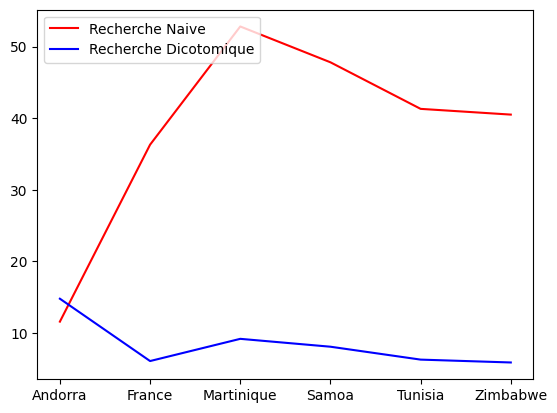

In [122]:
import matplotlib.pyplot as plt
import numpy as np

# setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# plot the function
plt.plot(search,elapsed_time_naive, 'r', label='Recherche Naive')
plt.plot(search,elapsed_time_dicotomie, 'b', label='Recherche Dicotomique')

plt.legend(loc='upper left')

# show the plot
plt.show()
